# Description of the Strategy

The Trendline-Pivot Strategy is based on the idea of taking advantage of the periods of the day that we have substantial amount of volume exchanged in the Market in order to take trades
We identify abnormal period of volume exchange

Pivot point and trend lines helps to get a clear sentiment of the investors in terms of the direction of the Market.

If the Price > Pivot and Short-term Trendline > Long-term Trendline and Volume > Treshold  ==> BUY

If the Price < Pivot and Short-term Trendline < Long-term Trendline and Volume > Treshold  ==> SELL

In [2]:
!pip install pyfolio

  Using cached pyfolio-0.9.2.tar.gz (91 kB)
  Using cached empyrical-0.5.3.tar.gz (50 kB)
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88667 sha256=dbfd99876040095b5a3fef49bb5add2c7657d82c02636f825153abb62f78a3b1
  Stored in directory: /Users/idrisstsafackteufack/Library/Caches/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.3-py3-none-any.whl size=37090 sha256=c67fa86f441e126f40b7f66e1eb06e2770085bf32796f9ca0cae8200aa80d294
  Stored in directory: /Users/idrisstsafackteufack/Library/Caches/pip/wheels/14/37/00/4e984eafe752f6df04a3b6c31c7ef42a0e9c5173ca5f2156d2
Successfully built pyfolio empyrical


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pyfolio as pf

/Users/idrisstsafackteufack/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/Users/idrisstsafackteufack/opt/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


# Data importation

In [4]:
df = pd.read_csv('GBPNZDM50709.csv',index_col=0)

In [5]:
df.tail(10)

,Open,High,Low,Close,Volume
Gmt time,,,,,
31.12.2009 23:10:00.000,2.2268,2.2268,2.2268,2.2268,3.0
31.12.2009 23:15:00.000,2.2268,2.2268,2.2268,2.2268,2.0
31.12.2009 23:20:00.000,2.2268,2.2268,2.2264,2.2268,3.0
31.12.2009 23:25:00.000,2.2261,2.2268,2.2261,2.2264,3.0
31.12.2009 23:30:00.000,2.2258,2.2268,2.2258,2.2268,2.0
31.12.2009 23:35:00.000,2.2268,2.2268,2.2268,2.2268,2.0
31.12.2009 23:40:00.000,2.2268,2.2268,2.2253,2.2268,3.0
31.12.2009 23:45:00.000,2.2268,2.2268,2.2268,2.2268,3.0
31.12.2009 23:50:00.000,2.2268,2.2268,2.2268,2.2268,2.0


In [6]:
# Rename the index column name

df.index.name = 'Date'

In [7]:
# Change the format of the datetime index into the american style datetime

df.index = pd.to_datetime(df.index, format = '%d.%m.%Y %H:%M:%S.%f')

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0


In [9]:
df.shape

(315648, 5)

# Drop the duplicates

In [10]:
df.drop_duplicates(keep=False)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0


In [11]:
df.shape

(315648, 5)

In [12]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31 23:10:00,2.2268,2.2268,2.2268,2.2268,3.0
2009-12-31 23:15:00,2.2268,2.2268,2.2268,2.2268,2.0
2009-12-31 23:20:00,2.2268,2.2268,2.2264,2.2268,3.0
2009-12-31 23:25:00,2.2261,2.2268,2.2261,2.2264,3.0
2009-12-31 23:30:00,2.2258,2.2268,2.2258,2.2268,2.0
2009-12-31 23:35:00,2.2268,2.2268,2.2268,2.2268,2.0
2009-12-31 23:40:00,2.2268,2.2268,2.2253,2.2268,3.0
2009-12-31 23:45:00,2.2268,2.2268,2.2268,2.2268,3.0
2009-12-31 23:50:00,2.2268,2.2268,2.2268,2.2268,2.0


# Plot the price chart

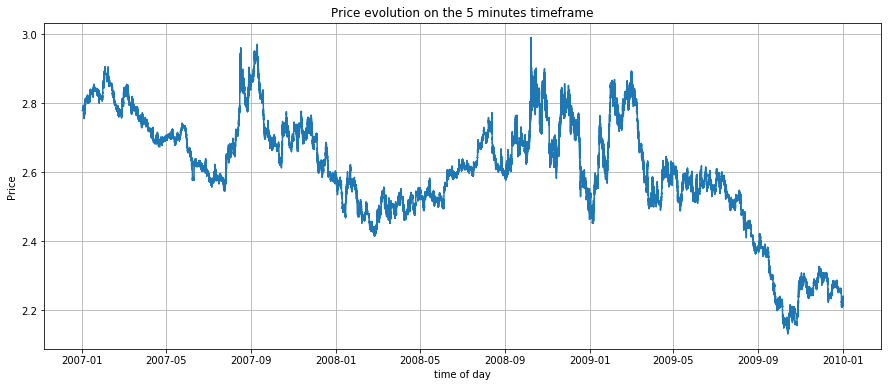

In [13]:
plt.figure(figsize = (15,6))
plt.plot(df['Close'])
plt.grid(True)
plt.title('Price evolution on the 5 minutes timeframe')
plt.xlabel('time of day')
plt.ylabel('Price')
plt.show()

# Duplicate the data frame

In [14]:
df1 = df.copy()
df2 = df.copy()

In [15]:
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0


# Strategy

# Trend indicators

In [16]:
# Trend line functions

slag = 20

llag = 50

vlag = 1440

# Short term moving average

df1['sma'] = df1['Close'].rolling(window = slag,center=False).mean() 

# Long term moving average

df1['lma'] = df1['Close'].rolling(window = llag,center=False).mean()

# Relative volume

df1['vol400'] = df1['Volume'].rolling(window = vlag,center = False).mean()

df1['Rvol'] = df1['Volume']/df1['vol400']

df1.head()

,Open,High,Low,Close,Volume,sma,lma,vol400,Rvol
Date,,,,,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0,NaN,NaN,NaN,NaN
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0,NaN,NaN,NaN,NaN
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0,NaN,NaN,NaN,NaN
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0,NaN,NaN,NaN,NaN
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0,NaN,NaN,NaN,NaN


In [17]:
df1.dropna(inplace=True)

df1.tail(10)

,Open,High,Low,Close,Volume,sma,lma,vol400,Rvol
Date,,,,,,,,,
2009-12-31 23:10:00,2.2268,2.2268,2.2268,2.2268,3.0,2.230881,2.229357,13.017722,0.230455
2009-12-31 23:15:00,2.2268,2.2268,2.2268,2.2268,2.0,2.230563,2.229348,13.019111,0.153620
2009-12-31 23:20:00,2.2268,2.2268,2.2264,2.2268,3.0,2.230279,2.229348,13.021194,0.230394
2009-12-31 23:25:00,2.2261,2.2268,2.2261,2.2264,3.0,2.229939,2.229364,13.023278,0.230357
2009-12-31 23:30:00,2.2258,2.2268,2.2258,2.2268,2.0,2.229240,2.229334,13.024667,0.153555
2009-12-31 23:35:00,2.2268,2.2268,2.2268,2.2268,2.0,2.228530,2.229304,13.026056,0.153538
2009-12-31 23:40:00,2.2268,2.2268,2.2253,2.2268,3.0,2.228035,2.229280,13.028139,0.230271
2009-12-31 23:45:00,2.2268,2.2268,2.2268,2.2268,3.0,2.227475,2.229245,13.030222,0.230234
2009-12-31 23:50:00,2.2268,2.2268,2.2268,2.2268,2.0,2.227245,2.229212,13.031611,0.153473


# Pivots indicators

In [18]:

df1['Pivot'] = (df1['High'].shift(1) + df1['Low'].shift(1) + df1['Close'].shift(1))/3

df1['S1'] = 2*df1['Pivot'] - df1['High'].shift(1)

df1['R1'] = 2*df1['Pivot'] - df1['Low'].shift(1)

df1.head(10)

,Open,High,Low,Close,Volume,sma,lma,vol400,Rvol,Pivot,S1,R1
Date,,,,,,,,,,,,
2007-01-26 00:00:00,2.82065,2.82307,2.82065,2.82118,46.0,2.821038,2.821649,0.031944,1440.000000,NaN,NaN,NaN
2007-01-26 00:05:00,2.81982,2.82009,2.81891,2.81913,50.0,2.820779,2.821678,0.066667,750.000000,2.821633,2.820197,2.822617
2007-01-26 00:10:00,2.81862,2.82082,2.81850,2.81888,32.0,2.820563,2.821684,0.088889,360.000000,2.819377,2.818663,2.819843
2007-01-26 00:15:00,2.81887,2.81967,2.81802,2.81803,46.0,2.820276,2.821646,0.120833,380.689655,2.819400,2.817980,2.820300
2007-01-26 00:20:00,2.81834,2.81910,2.81755,2.81792,42.0,2.820012,2.821603,0.150000,280.000000,2.818573,2.817477,2.819127
2007-01-26 00:25:00,2.81775,2.81992,2.81736,2.81835,33.0,2.819762,2.821574,0.172917,190.843373,2.818190,2.817280,2.818830
2007-01-26 00:30:00,2.81818,2.81899,2.81687,2.81697,22.0,2.819565,2.821512,0.188194,116.900369,2.818543,2.817167,2.819727
2007-01-26 00:35:00,2.81675,2.81781,2.81664,2.81740,36.0,2.819467,2.821467,0.213194,168.859935,2.817610,2.816230,2.818350
2007-01-26 00:40:00,2.81738,2.81985,2.81687,2.81692,41.0,2.819272,2.821395,0.241667,169.655172,2.817283,2.816757,2.817927


/Users/idrisstsafackteufack/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


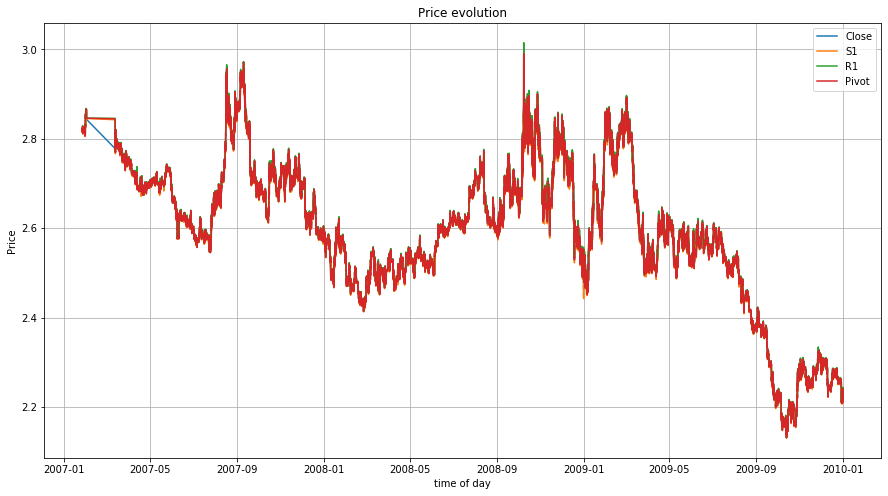

In [19]:
# Plot figures

plt.figure(figsize=(15,8))
plt.plot(df1['Close'], linewidth = 1.5, label = 'Close')
plt.plot(df1['S1'], linewidth = 1.5, label = 'S1')
plt.plot(df1['R1'], linewidth = 1.5, label = 'R1')
plt.plot(df1['Pivot'], linewidth = 1.5, label = 'Pivot')
plt.grid(True)
plt.xlabel('time of day')
plt.ylabel('Price')
plt.title('Price evolution')
plt.legend()
plt.show()

# Identify the weeks of the day

In [20]:
df2['dayofweek'] = df2.index.dayofweek

df2.head(10)

,Open,High,Low,Close,Volume,dayofweek
Date,,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:25:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:30:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:35:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:40:00,2.77951,2.77951,2.77951,2.77951,0.0,0


# Drop week-end days

In [21]:
# Drop the week-end days as those days are not business days

df2[(df2.dayofweek!=5) | (df2.dayofweek!=6)]
df2.head(10000)

,Open,High,Low,Close,Volume,dayofweek
Date,,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0,0
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0,0
...,...,...,...,...,...,...
2007-02-04 16:55:00,2.88695,2.88695,2.88695,2.88695,0.0,6
2007-02-04 17:00:00,2.88695,2.88695,2.88695,2.88695,0.0,6
2007-02-04 17:05:00,2.88695,2.88695,2.88695,2.88695,0.0,6


# Create new variables to identify days of year and years 

In [22]:
df2.index[-1].year

2009

In [23]:
df2['days']= df2.index.dayofyear

df2['year'] = df2.index.year

df2.head(50)

,Open,High,Low,Close,Volume,dayofweek,days,year
Date,,,,,,,,
2007-01-01 00:00:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:05:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:10:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:15:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:20:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:25:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:30:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:35:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007
2007-01-01 00:40:00,2.77951,2.77951,2.77951,2.77951,0.0,0,1,2007


In [24]:
df2['days'].max()

366

In [25]:
year_start = df2.index[0].year
df2['High'].loc[(df2['year']==year_start) & (df2['days']==3)].iloc[0]

2.7949599999999997

# Pivot functions

In [26]:
def ppsr(data):
    
    max_day = data['days'].max() #Max number of days in the sample
    y_start = data.index[0].year  # the starting year
    y_end = data.index[-1].year   # the ending year 
    
    for y in range(y_start,y_end):
        for d in range(1,max_day):
            if (d<3) and (y==y_start):
                continue
                
            high = data.loc[(data['year']==y) & (data['days']==d),'High'].max()
            low = data.loc[(data['year']==y) & (data['days']==d),'Low'].min()
            close = data.loc[(data['year']==y) & (data['days']==d),'Close'].iloc[-1]
            data.loc[(data['year']==y) & (data['days']==d),'pp'] = (high+low+close)/3
            pp = data.loc[(data['year']==y) & (data['days']==d),'pp'].mean()
            data.loc[(data['year']==y) & (data['days']==d),'R1'] = 2*pp - low
            data.loc[(data['year']==y) & (data['days']==d),'S1'] = 2*pp - high
            data.loc[(data['year']==y) & (data['days']==d),'S2'] = pp - high + low
            data.loc[(data['year']==y) & (data['days']==d),'R2'] = pp - low + high
            data.loc[(data['year']==y) & (data['days']==d),'S3'] = low - 2*(high - pp)
            data.loc[(data['year']==y) & (data['days']==d),'R3'] = high + 2*(pp - low)
    return data


# Moving average functions

In [27]:
# Construct short and long moving averages

def SimpleMa(data,short_lag,long_lag):
    data['sma'] = data['Close'].rolling(window = short_lag, center = False).mean()
    data['lma'] = data['Close'].rolling(window = long_lag, center = False).mean()
    return data

# Relative volume function

In [28]:
def Relative_volume(data,period):
    data['Averagevol']= data['Volume'].rolling(window = period, center = False).mean()
    data['Rvol'] = data['Volume']/data['Averagevol']
    return data

# Relative Strength Index function

In [29]:
def RSI(data,period):
    data['Change'] = data['Close'].pct_change(1)
    data['Pos_change'] = np.where(data['Change']>0,1,0)
    data['Neg_change'] = np.where(data['Change']<0,1,0)
    data['Gain'] = data['Change']*data['Pos_change']
    data['Loss'] = data['Change']*data['Neg_change']
    data['AV_Gain'] = data['Gain'].rolling(window = period, center = False).mean()
    data['AV_Loss'] = data['Loss'].rolling(window = period, center = False).mean()
    data['RS'] = data['AV_Gain']/data['AV_Loss']
    data['RSI'] = 100 - 100/(1+data['RS'])
    return data

In [30]:

data = ppsr(df2)

RSI_lag = 10

slag = 20

llag = 50

vollag = 7200

data = SimpleMa(data,slag,llag)

data = Relative_volume(data,vollag)

data.dropna(inplace = True)

data.head(50)

,Open,High,Low,Close,Volume,dayofweek,days,year,pp,R1,S1,S2,R2,S3,R3,sma,lma,Averagevol,Rvol
Date,,,,,,,,,,,,,,,,,,,
2007-01-26 00:00:00,2.82065,2.82307,2.82065,2.82118,46.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.821038,2.821649,0.006389,7200.000000
2007-01-26 00:05:00,2.81982,2.82009,2.81891,2.81913,50.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.820779,2.821678,0.013333,3750.000000
2007-01-26 00:10:00,2.81862,2.82082,2.81850,2.81888,32.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.820563,2.821684,0.017778,1800.000000
2007-01-26 00:15:00,2.81887,2.81967,2.81802,2.81803,46.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.820276,2.821646,0.024167,1903.448276
2007-01-26 00:20:00,2.81834,2.81910,2.81755,2.81792,42.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.820012,2.821603,0.030000,1400.000000
2007-01-26 00:25:00,2.81775,2.81992,2.81736,2.81835,33.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.819762,2.821574,0.034583,954.216867
2007-01-26 00:30:00,2.81818,2.81899,2.81687,2.81697,22.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.819565,2.821512,0.037639,584.501845
2007-01-26 00:35:00,2.81675,2.81781,2.81664,2.81740,36.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.819467,2.821467,0.042639,844.299674
2007-01-26 00:40:00,2.81738,2.81985,2.81687,2.81692,41.0,4,26,2007,2.81779,2.82433,2.80681,2.80027,2.83531,2.78929,2.84185,2.819272,2.821395,0.048333,848.275862


# Plot to visualize

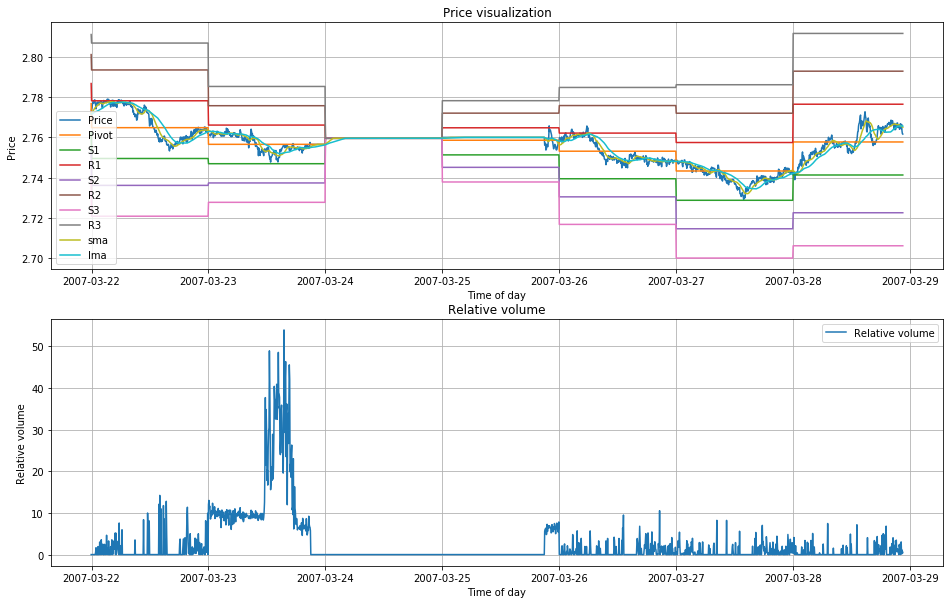

In [31]:
plt.figure(figsize=(16,10))
plt.subplot(211)
plt.plot(df2['Close'].iloc[10000:12000], lw=1.5, label='Price')
plt.plot(df2['pp'].iloc[10000:12000], lw=1.5, label='Pivot')
plt.plot(df2['S1'].iloc[10000:12000], lw=1.5, label='S1')
plt.plot(df2['R1'].iloc[10000:12000], lw=1.5, label='R1')
plt.plot(df2['S2'].iloc[10000:12000], lw=1.5, label='S2')
plt.plot(df2['R2'].iloc[10000:12000], lw=1.5, label='R2')
plt.plot(df2['S3'].iloc[10000:12000], lw=1.5, label='S3')
plt.plot(df2['R3'].iloc[10000:12000], lw=1.5, label='R3')
plt.plot(df2['sma'].iloc[10000:12000], lw=1.5, label='sma')
plt.plot(df2['lma'].iloc[10000:12000], lw=1.5, label='lma')
plt.title('Price visualization')
plt.xlabel('Time of day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.subplot(212)
plt.plot(df2['Rvol'].iloc[10000:12000], lw=1.5, label='Relative volume')
plt.title('Relative volume')
plt.xlabel('Time of day')
plt.ylabel('Relative volume')
plt.grid(True)
plt.legend()

# The signal

In [32]:

# LONG SIGNAL
df2['Long_Signal'] = np.where((df2['sma'] > df2['lma']) 
                            & (df2['Close'] > df2['pp'])
                            & (df2['Rvol'] > 1)
                            , True, False)




# LONG SIGNAL EXIT

df2['Long_Exit'] = df2.Close >= df2.R1


# SHORT SIGNAL

df2['Short_Signal'] = np.where((df2['sma'] < df2['lma']) 
                            & (df2['Close'] < df2['pp'])
                            & (df2['Rvol'] > 1)
                            , True, False)

# SHORT SIGNAL EXIT

df2['Short_Exit'] = df2.Close <= df2.S1



# POSITIONS LONG

df2['positions_long'] = np.nan  
df2.loc[df2.Long_Signal,'positions_long'] = 1  
df2.loc[df2.Long_Exit,'positions_long'] = 0  

df2.positions_long = df2.positions_long.fillna(method='ffill')  



# POSITIONS SHORT


df2['positions_short'] = np.nan  
df2.loc[df2.Short_Signal,'positions_short'] = -1  
df2.loc[df2.Short_Exit,'positions_short'] = 0  

df2.positions_short = df2.positions_short.fillna(method='ffill')  



# POSITIONS  

df2['positions'] = df2.positions_long + df2.positions_short

df2.dropna(inplace=True)

In [33]:
df2['positions_long'].min()

0.0

In [34]:
df2.head(300)

,Open,High,Low,Close,Volume,dayofweek,days,year,pp,R1,...,lma,Averagevol,Rvol,Long_Signal,Long_Exit,Short_Signal,Short_Exit,positions_long,positions_short,positions
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-26 03:30:00,2.81910,2.82037,2.81910,2.81985,32.0,4,26,2007,2.81779,2.82433,...,2.817988,0.222917,143.551402,True,False,False,False,1.0,-1.0,0.0
2007-01-26 03:35:00,2.82074,2.82146,2.82003,2.82081,37.0,4,26,2007,2.81779,2.82433,...,2.818017,0.228056,162.241169,True,False,False,False,1.0,-1.0,0.0
2007-01-26 03:40:00,2.82069,2.82138,2.82004,2.82131,39.0,4,26,2007,2.81779,2.82433,...,2.818028,0.233472,167.043427,True,False,False,False,1.0,-1.0,0.0
2007-01-26 03:45:00,2.82115,2.82182,2.82007,2.82032,35.0,4,26,2007,2.81779,2.82433,...,2.818012,0.238333,146.853147,True,False,False,False,1.0,-1.0,0.0
2007-01-26 03:50:00,2.82012,2.82012,2.81847,2.81847,43.0,4,26,2007,2.81779,2.82433,...,2.818009,0.244306,176.009096,True,False,False,False,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-27 04:05:00,2.81580,2.81580,2.81580,2.81580,0.0,5,27,2007,2.81580,2.81580,...,2.815800,2.607500,0.000000,False,True,False,False,0.0,-1.0,-1.0
2007-01-27 04:10:00,2.81580,2.81580,2.81580,2.81580,0.0,5,27,2007,2.81580,2.81580,...,2.815800,2.607500,0.000000,False,True,False,False,0.0,-1.0,-1.0
2007-01-27 04:15:00,2.81580,2.81580,2.81580,2.81580,0.0,5,27,2007,2.81580,2.81580,...,2.815800,2.607500,0.000000,False,True,False,False,0.0,-1.0,-1.0


# Count the number of Long and short positions

In [35]:
df2['positions'].value_counts()

 0.0    96236
-1.0    55107
 1.0    45816
Name: positions, dtype: int64

# Buy and Sell Signals

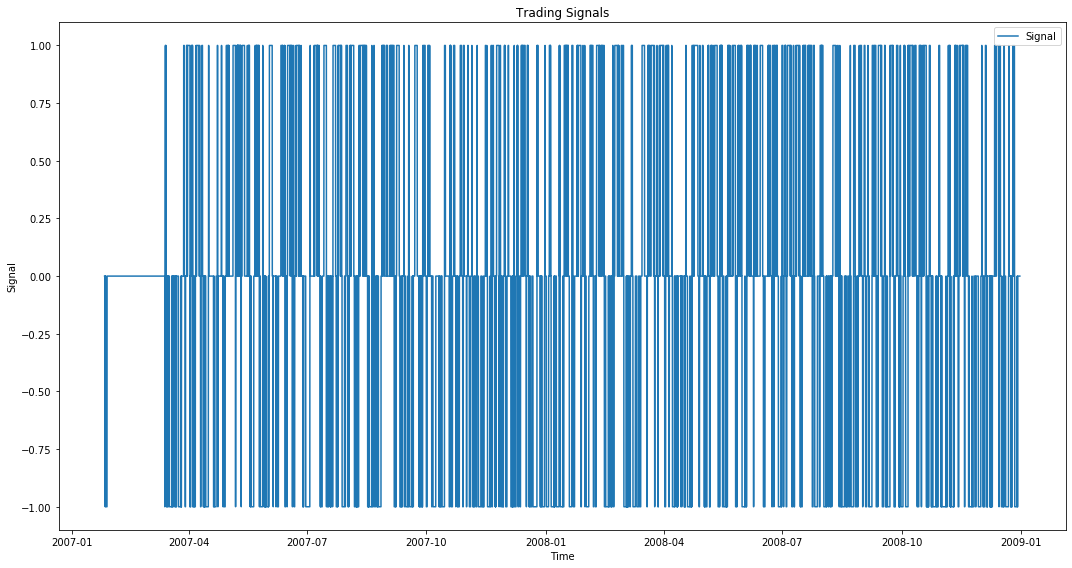

In [36]:
plt.figure(figsize=(15,8))
plt.plot(df2['positions'], lw=1.5, label ='Signal')
plt.title('Trading Signals')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.tight_layout()
plt.legend()
plt.show()

# Compare our strategy to the Buy and Hold strategy

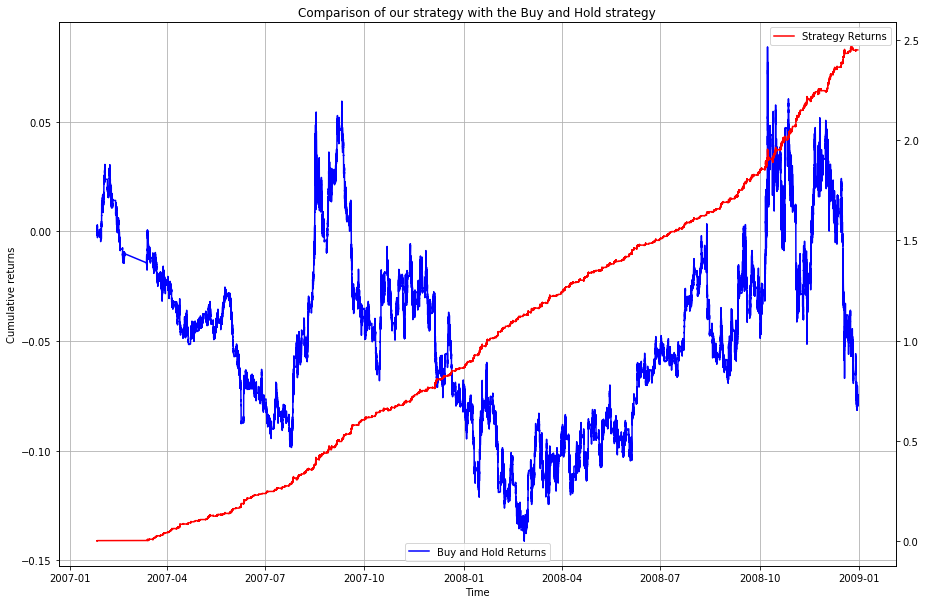

In [37]:
df2['Buy & Hold Returns'] = (df2['Close'] - df2['Close'].shift(1))/df2['Close'].shift(1)
df2['Strategy Returns'] = df2.positions.shift(1) * df2['Buy & Hold Returns']


# Plot

#plt.figure(figsize=(15,10))
fig, ax1 = plt.subplots(figsize=(15,10))
plt.plot(df2['Buy & Hold Returns'].cumsum(), 'b', lw = 1.5, label = 'Buy and Hold Returns')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('Time')
plt.ylabel('Cumulative returns')
plt.title('Comparison of our strategy with the Buy and Hold strategy')
ax2 = ax1.twinx()
plt.plot(df2['Strategy Returns'].cumsum(), 'r', lw = 1.5, label = 'Strategy Returns')
plt.legend(loc=0)
plt.show()


# Statistics : Analysing the Performance of the Strategy

# Long and Short Trades

In [38]:

Total_Trades = df2.loc[df2['positions']==1,'positions'].count() + df2.loc[df2['positions']==-1,'positions'].count()

Long_Trades = df2.loc[df2['positions']==1 ,'positions'].count()

Short_Trades = df2.loc[df2['positions']==-1 ,'positions'].count()

# Percentage of Long and Short Trades

pct_long_trades = round(100*Long_Trades/Total_Trades,2)

pct_short_trades = round(100*Short_Trades/Total_Trades,2)


Total_Trades

100923

In [39]:
# Percentage of Long Trades
pct_long_trades

45.4

In [40]:
# Percentage of Short Trades
pct_short_trades

54.6

# Winning Trades and Losing Trades

In [41]:
# Winning Trades and Losing Trades

Winning_Trades = df2.loc[df2['Strategy Returns'] > 0,'Strategy Returns'].count()

Losing_Trades = df2.loc[df2['Strategy Returns'] < 0,'Strategy Returns'].count()

pct_Winning_Trades = round(100*Winning_Trades/(Winning_Trades + Losing_Trades),2)

pct_Losing_Trades = round(100*Losing_Trades/(Winning_Trades + Losing_Trades),2)

In [42]:
# Percentage of Winning Trades

pct_Winning_Trades

51.87

In [43]:
# Percentage of Losing Trades

pct_Losing_Trades

48.13

In [44]:
# Empirical Average Risk Reward

Risk_Reward = pct_Winning_Trades/(100 - pct_Winning_Trades)

Risk_Reward

1.0777062123415748

# Average profitable trades

In [45]:
# Max drawdown

Max_Drawdown = df2['Strategy Returns'].min()

Max_Drawdown

-0.014335771389692073

In [46]:
# Average Profitable Trade 

Average_Profitable_Trade = df2.loc[df2['Strategy Returns'] > 0,'Strategy Returns'].mean()

Average_Profitable_Trade

0.0005857222695842067

In [47]:
# Average Losing Trade 

Average_Losing_Trade = df2.loc[df2['Strategy Returns'] < 0,'Strategy Returns'].mean()

Average_Losing_Trade

-0.0005407306546864908

In [48]:
# Average Trade

Average_Trade = Average_Profitable_Trade*(pct_Winning_Trades/100) + Average_Losing_Trade*(pct_Losing_Trades/100)

Average_Trade

4.3560477132719995e-05

# Average daily Return

In [49]:
Nber_of_minute5 = df2['positions'].count()
Nber_of_minute5

197159

In [50]:
start = dt.date(2016,1,1)
end = dt.date(2018,12,31)

Nber_of_days = np.busday_count(start, end)

Nber_of_days

781

In [51]:
# Average Daily Return

Average_Daily_Return = 1440*df2['Strategy Returns'].mean()

Average_Daily_Return

0.017897340221300594

In [52]:
# Average Number of Trades per day

Nber_of_Trade_per_Day = (Total_Trades)/Nber_of_days

Nber_of_Trade_per_Day

129.22279129321382

In [53]:
# Average Winning Trades

# Weekly Return

In [54]:
Nber_of_week = Nber_of_days/5

Nber_of_week

156.2

In [55]:
# Average Weekly Return

Average_Weekly_Return = 1440*5*df2['Strategy Returns'].mean()

Average_Weekly_Return

0.08948670110650296

In [56]:
# Average Number of Trades per week

Nber_of_Trade_per_Week = (Total_Trades)/Nber_of_week

Nber_of_Trade_per_Week

646.1139564660692

# Monthly Return

In [57]:
Nber_of_month = Nber_of_days/20

Nber_of_month

39.05

In [58]:
# Average Monthly Return

Average_Monthly_Return = 1440*5*4*df2['Strategy Returns'].mean()

Average_Monthly_Return

0.35794680442601184

In [59]:
# Average Number of Trades per Month

Nber_of_Trade_per_Month = (Total_Trades)/Nber_of_month

Nber_of_Trade_per_Month

2584.455825864277

# Yearly Return

In [60]:
Nber_of_year = Nber_of_days/252

Nber_of_year

3.0992063492063493

In [61]:
# Average Yearly Return

Average_Yearly_Return = 1440*5*4*Nber_of_year*df2['Strategy Returns'].mean()

Average_Yearly_Return

1.1093510089552192

In [62]:
# Average Number of Trades per Month

Nber_of_Trade_per_Year = (Total_Trades)/Nber_of_year

Nber_of_Trade_per_Year

32564.143405889885

# Sharpe Ratio

In [63]:
# Yearly Sharpe Ratio
SR = (df2['Strategy Returns'].mean())/df2['Strategy Returns'].std()
SR = SR*np.sqrt(252*1440)
SR

16.499587464021076

In [64]:
# Sortino ratio

S1 = df2.loc[df2['Strategy Returns'] <0,'Strategy Returns'].std()

Sortino_Ratio = (df2['Strategy Returns'].mean())/S1

Sortino_Ratio = Sortino_Ratio*np.sqrt(252*1440)

Sortino_Ratio


12.389102895146502

In [65]:
S1 = df2.loc[df2['Strategy Returns'] <0,'Strategy Returns'].std()
S1

0.0006043209613792485

In [66]:
S2 = df2['Strategy Returns'].std()
S2

0.0004537685920055559

# Performance analysis


Start date,2007-01-26
End date,2008-12-30
Total months,9388
,Backtest
Annual return,0.3%
Cumulative returns,1036.0%
Annual volatility,0.7%
Sharpe ratio,0.43
Calmar ratio,0.05
Stability,0.99
Max drawdown,-6.4%


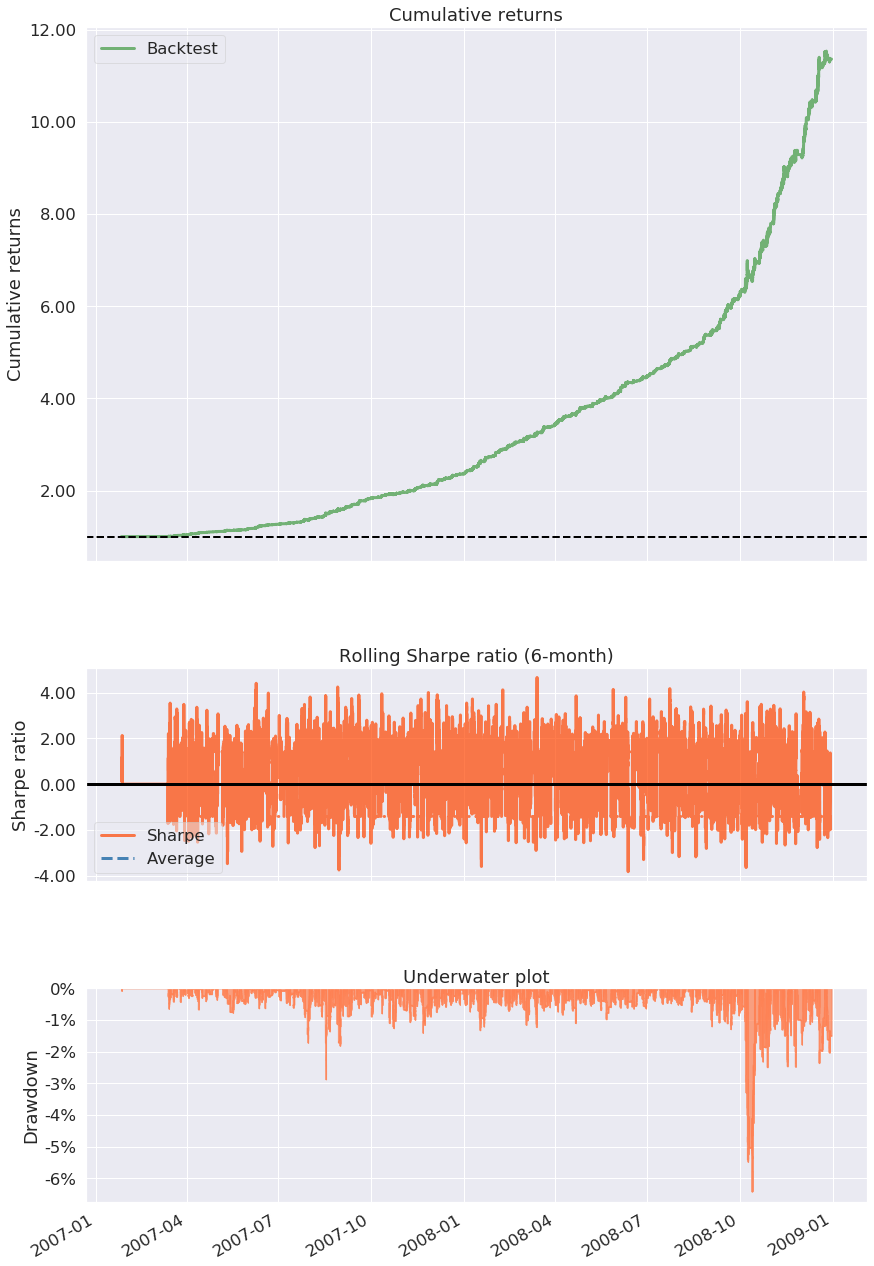

In [67]:

pf.create_simple_tear_sheet(df2['Strategy Returns'])

# Full performance analysis

In [69]:
pf.create_full_tear_sheet(df2['Strategy Returns'])

Start date,2007-01-26
End date,2008-12-30
Total months,9388
,Backtest
Annual return,0.3%
Cumulative returns,1036.0%
Annual volatility,0.7%
Sharpe ratio,0.43
Calmar ratio,0.05
Stability,0.99
Max drawdown,-6.4%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

Stress Events,mean,min,max
Lehman,0.00%,-0.58%,0.89%
Aug07,0.00%,-0.84%,0.58%
Mar08,0.00%,-0.32%,0.38%
Sept08,0.00%,-0.58%,0.89%
Low Volatility Bull Market,0.00%,-0.68%,0.77%
GFC Crash,0.00%,-1.43%,1.33%


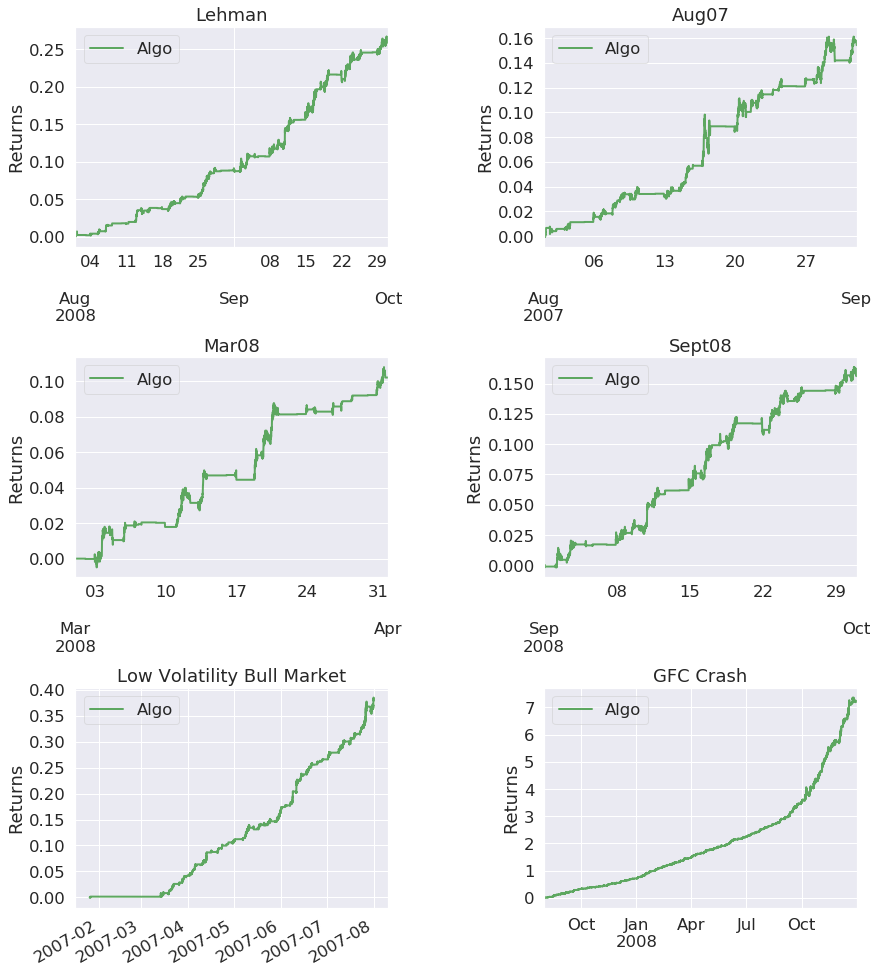

In [70]:
pf.create_interesting_times_tear_sheet(df2['Strategy Returns'])

In [71]:
pf.create_returns_tear_sheet(df2['Strategy Returns'])

Start date,2007-01-26
End date,2008-12-30
Total months,9388
,Backtest
Annual return,0.3%
Cumulative returns,1036.0%
Annual volatility,0.7%
Sharpe ratio,0.43
Calmar ratio,0.05
Stability,0.99
Max drawdown,-6.4%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'